# Exploratory Data Analysis (EDA) 

Conduct EDA on the Mexico Price data to examine relationships and examine time series data.

In [94]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats

In [95]:
price_data = pd.read_csv("price_data_cleaned_v2.csv")

In [96]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179227 entries, 0 to 179226
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                179227 non-null  object 
 1   Hour                179227 non-null  int64  
 2   Zone                179227 non-null  object 
 3   LMP                 179227 non-null  float64
 4   Energy_LMP          179227 non-null  float64
 5   Loss_LMP            179227 non-null  float64
 6   Congestion_LMP      179227 non-null  float64
 7   STATION             37986 non-null   float64
 8   NAME                37986 non-null   object 
 9   LATITUDE            37986 non-null   float64
 10  LONGITUDE           37986 non-null   float64
 11  TMP                 37986 non-null   float64
 12  DATETIME            37986 non-null   object 
 13  Time                37986 non-null   object 
 14  GD Henry Hub        179227 non-null  float64
 15  GD Houston ShipChl  178267 non-nul

In [97]:
price_data.head()

,Date,Hour,Zone,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,STATION,NAME,LATITUDE,LONGITUDE,TMP,DATETIME,Time,GD Henry Hub,GD Houston ShipChl,GD Waha
0,2016-02-05 00:00:00,20,MONTERREY,575.21,748.03,-62.02,-110.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.045,1.99,1.94
1,2016-02-05 00:00:00,20,VDM SUR,765.12,748.03,21.20,-4.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.045,1.99,1.94
2,2016-02-05 00:00:00,21,CHIHUAHUA,632.40,745.34,-74.92,-38.02,7.622510e+10,"CHIHUAHUA CHIH., MX",28.633333,-106.083333,55.76,2016-02-05 21:00:00,21:00:00,2.045,1.99,1.94
3,2016-02-05 00:00:00,21,GUADALAJARA,789.74,745.34,31.91,12.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.045,1.99,1.94
4,2016-02-05 00:00:00,21,MONTERREY,566.03,745.34,-58.33,-120.99,7.639310e+10,"MONTERREY N.L., MX",25.733333,-100.300000,59.00,2016-02-05 21:00:00,21:00:00,2.045,1.99,1.94


We don't need station information so I will drop those columns.

In [98]:
price_features = price_data.drop(['STATION', 'NAME','LATITUDE', 'LONGITUDE', 'DATETIME', 'Time'], axis = 1)

In [99]:
price_features.head()

,Date,Hour,Zone,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,GD Henry Hub,GD Houston ShipChl,GD Waha
0,2016-02-05 00:00:00,20,MONTERREY,575.21,748.03,-62.02,-110.80,NaN,2.045,1.99,1.94
1,2016-02-05 00:00:00,20,VDM SUR,765.12,748.03,21.20,-4.11,NaN,2.045,1.99,1.94
2,2016-02-05 00:00:00,21,CHIHUAHUA,632.40,745.34,-74.92,-38.02,55.76,2.045,1.99,1.94
3,2016-02-05 00:00:00,21,GUADALAJARA,789.74,745.34,31.91,12.48,NaN,2.045,1.99,1.94
4,2016-02-05 00:00:00,21,MONTERREY,566.03,745.34,-58.33,-120.99,59.00,2.045,1.99,1.94


In [100]:
price_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179227 entries, 0 to 179226
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                179227 non-null  object 
 1   Hour                179227 non-null  int64  
 2   Zone                179227 non-null  object 
 3   LMP                 179227 non-null  float64
 4   Energy_LMP          179227 non-null  float64
 5   Loss_LMP            179227 non-null  float64
 6   Congestion_LMP      179227 non-null  float64
 7   TMP                 37986 non-null   float64
 8   GD Henry Hub        179227 non-null  float64
 9   GD Houston ShipChl  178267 non-null  float64
 10  GD Waha             179227 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 15.0+ MB


In [101]:
#Turn date to datetime
price_features['Date']= pd.to_datetime(price_features['Date'])
price_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179227 entries, 0 to 179226
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                179227 non-null  datetime64[ns]
 1   Hour                179227 non-null  int64         
 2   Zone                179227 non-null  object        
 3   LMP                 179227 non-null  float64       
 4   Energy_LMP          179227 non-null  float64       
 5   Loss_LMP            179227 non-null  float64       
 6   Congestion_LMP      179227 non-null  float64       
 7   TMP                 37986 non-null   float64       
 8   GD Henry Hub        179227 non-null  float64       
 9   GD Houston ShipChl  178267 non-null  float64       
 10  GD Waha             179227 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 15.0+ MB


In [102]:
price_features.head()

,Date,Hour,Zone,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,GD Henry Hub,GD Houston ShipChl,GD Waha
0,2016-02-05,20,MONTERREY,575.21,748.03,-62.02,-110.80,NaN,2.045,1.99,1.94
1,2016-02-05,20,VDM SUR,765.12,748.03,21.20,-4.11,NaN,2.045,1.99,1.94
2,2016-02-05,21,CHIHUAHUA,632.40,745.34,-74.92,-38.02,55.76,2.045,1.99,1.94
3,2016-02-05,21,GUADALAJARA,789.74,745.34,31.91,12.48,NaN,2.045,1.99,1.94
4,2016-02-05,21,MONTERREY,566.03,745.34,-58.33,-120.99,59.00,2.045,1.99,1.94


## Review Summary Statistics

In [103]:
price_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour,179227.0,12.500728,6.922357,1.000,7.000,13.00,19.000,25.000
LMP,179227.0,1054.365034,748.331451,-89.040,567.030,849.65,1335.270,13159.060
Energy_LMP,179227.0,1098.577389,668.045435,-0.010,620.720,910.77,1408.700,11754.890
Loss_LMP,179227.0,-18.933689,103.289802,-1533.570,-68.570,7.18,36.280,1796.850
Congestion_LMP,179227.0,-25.278674,316.644957,-4107.670,-14.660,0.00,0.000,10744.470
TMP,37986.0,68.056214,12.180127,32.000,59.720,68.00,76.640,109.400
GD Henry Hub,179227.0,2.655008,0.860794,1.335,2.215,2.71,2.940,23.605
GD Houston ShipChl,178267.0,3.413529,14.219050,1.380,2.165,2.69,2.975,400.000
GD Waha,179227.0,2.276758,8.674037,-5.790,1.275,1.91,2.565,208.790


#### General Plots to review data over the entire dataset timespan

<AxesSubplot:xlabel='Date'>

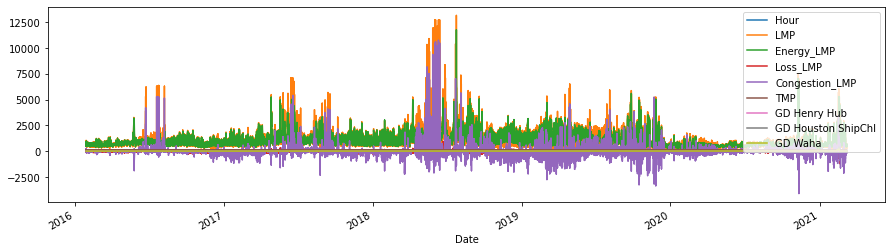

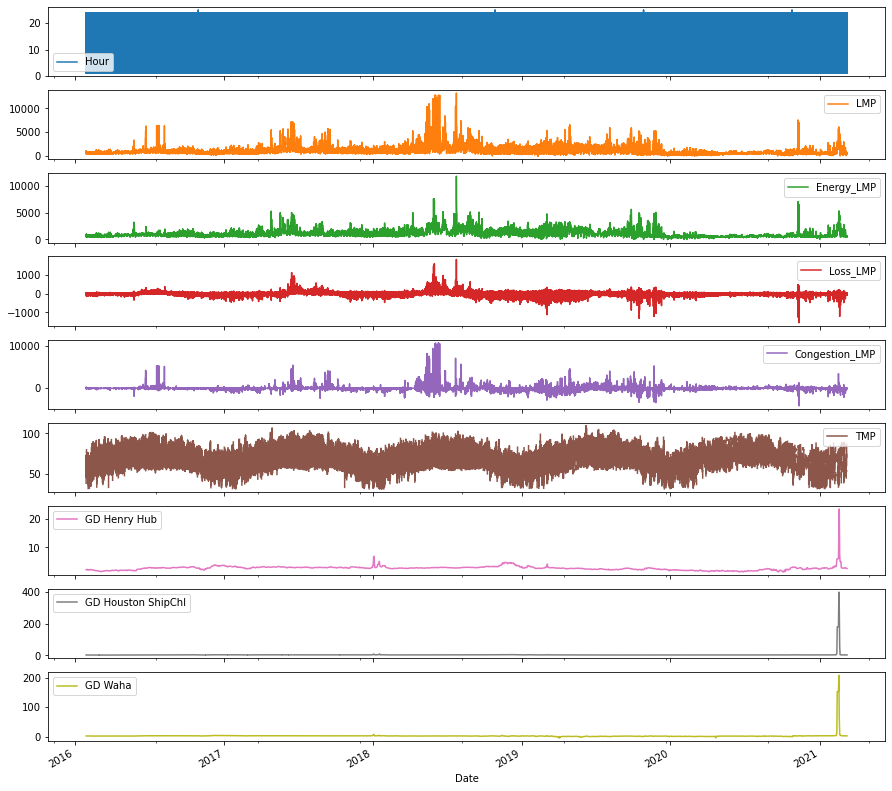

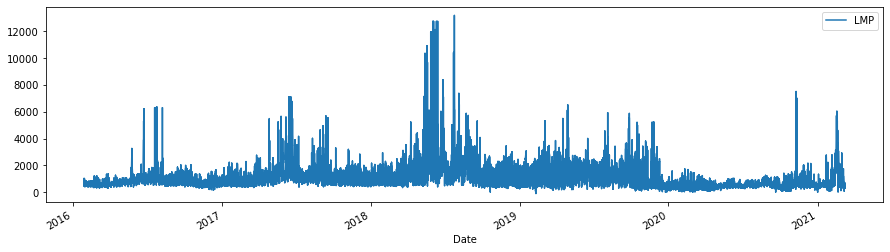

In [104]:
# General Plots to review data over the entire dataset timespan
price_features.plot(x="Date", figsize=(15,4))
price_features.plot(x="Date", subplots=True, figsize=(15,15))
price_features.plot(x="Date", y="LMP", figsize=(15,4))

PLOT 1 - Not very helpful as all the data is bundled together <br>
PLOT 2 - Subplots the different columns. Can tell more from here. The temperature data is incomplete. The pandemic is noticable in the energy columns for the year 2020. The freeze storm that rattled the energy market can be seen in 2021 and is skewing the indeces for the natural gas price plots. <br>
PLOT 3 - Shows the target variable through the data set.

#### Daily Average of Price Components Over Time

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

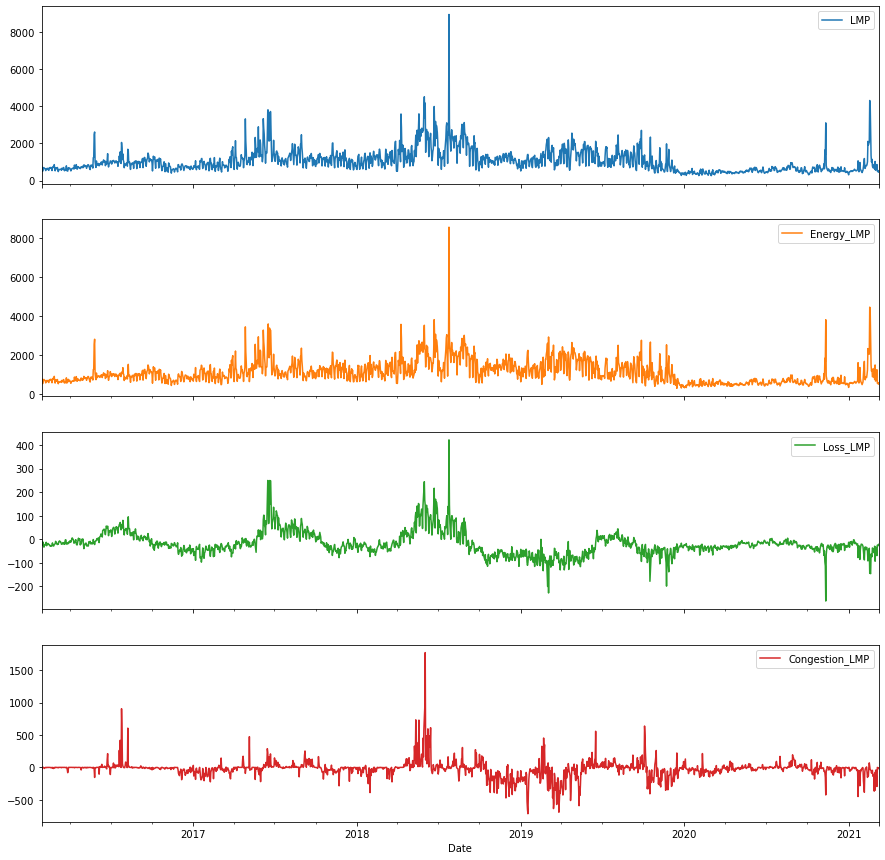

In [105]:
adp = price_features.groupby('Date')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP']].mean()
adp.plot(subplots=True, figsize=(15,15))

#### Daily Average of Price Components By Hour

array([<AxesSubplot:title={'center':'LMP'}, xlabel='Hour'>,
       <AxesSubplot:title={'center':'Energy_LMP'}, xlabel='Hour'>,
       <AxesSubplot:title={'center':'Loss_LMP'}, xlabel='Hour'>,
       <AxesSubplot:title={'center':'Congestion_LMP'}, xlabel='Hour'>],
      dtype=object)

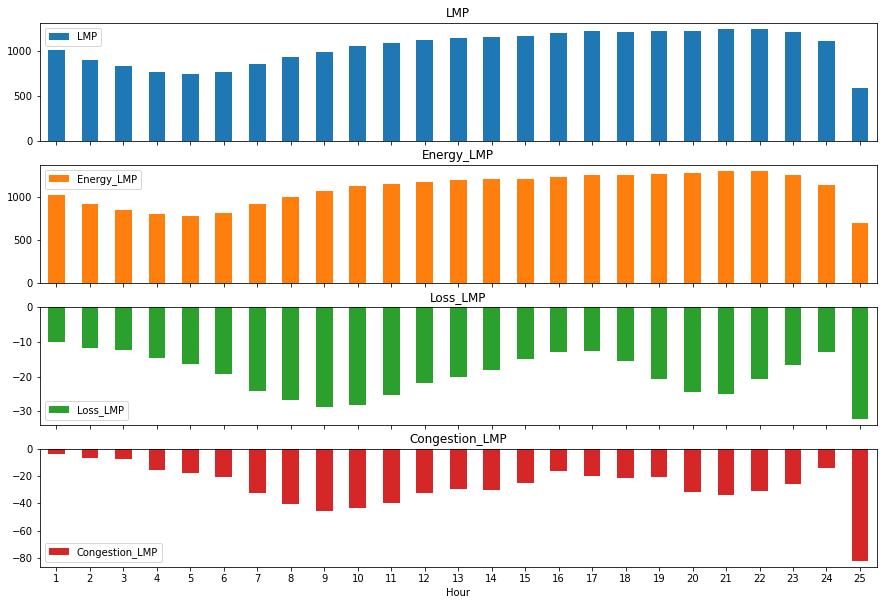

In [106]:
adp = price_features.groupby('Hour')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP']].mean()
adp.plot(subplots=True, figsize=(15,10), kind = 'bar', rot = 0)

25th Hour corresponds to DST and is therefore skewed towards November and March

#### Daily Average of Price Components By Zone

array([<AxesSubplot:title={'center':'LMP'}, xlabel='Zone'>,
       <AxesSubplot:title={'center':'Energy_LMP'}, xlabel='Zone'>,
       <AxesSubplot:title={'center':'Loss_LMP'}, xlabel='Zone'>,
       <AxesSubplot:title={'center':'Congestion_LMP'}, xlabel='Zone'>],
      dtype=object)

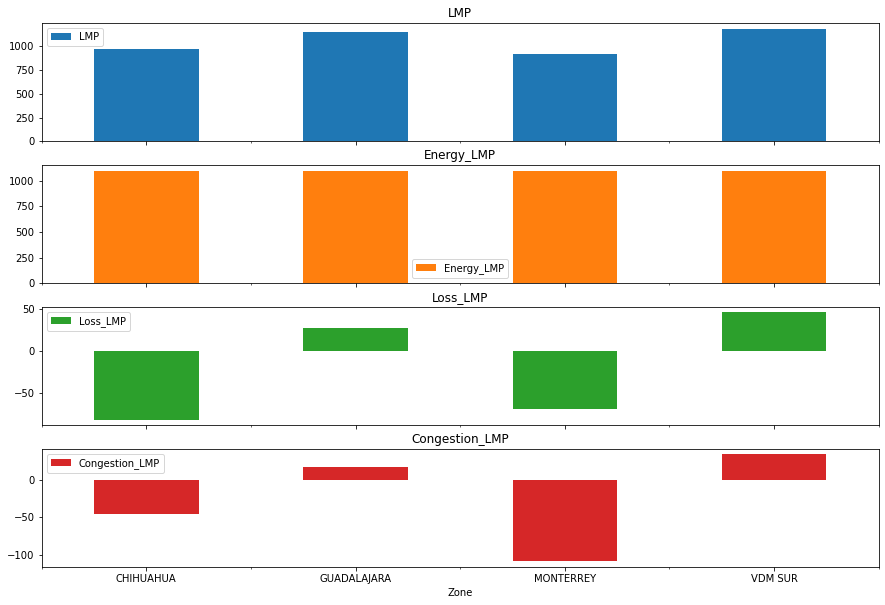

In [107]:
zdp = price_features.groupby('Zone')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP']].mean()
zdp.plot(subplots=True, figsize=(15,10), kind = 'bar', rot = 0)

Here we can see how to Loss and Congestion component of the price are highly influenced by zone.

#### Scatter of AVG Temp and Price Components per day

<AxesSubplot:xlabel='Date'>

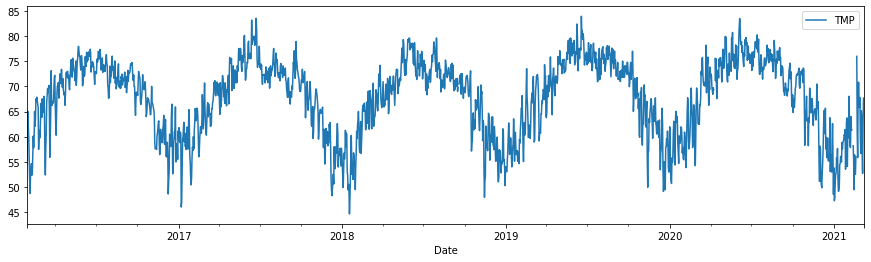

In [108]:
tdp = price_features.groupby('Date')[['LMP' ,'Energy_LMP', 'Loss_LMP', 'Congestion_LMP', 'TMP']].mean()
#tdp.plot(x = 'TMP', y = 'LMP', subplots=True, figsize=(15,10), kind = 'scatter', rot = 0)
tdp.plot(y="TMP", figsize=(15,4))

Note from first go around "It looks like we have some non realistic temperature averages. Let's examine them."<br>
This has since been corrected by removing bad readings from initial weather data set.

In [134]:
tdp.TMP.sort_values(ascending = False).head(5)

Date
2019-06-18    83.960000
2017-06-23    83.550435
2020-06-05    83.505714
2017-06-13    83.187500
2019-06-08    82.415652
Name: TMP, dtype: float64

Top value looks low. Lets take a look at the temps for that date.

In [133]:
filtered_temp = price_features[price_features['TMP'].notnull()]
filtered_temp[filtered_temp['Date'] == '2019-06-18']

,Date,Hour,Zone,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,GD Henry Hub,GD Houston ShipChl,GD Waha
103557,2019-06-18,3,CHIHUAHUA,1704.09,1670.60,33.48,0.0,86.00,2.39,2.37,-0.025
103559,2019-06-18,3,MONTERREY,1597.01,1670.60,-73.59,0.0,84.56,2.39,2.37,-0.025
103581,2019-06-18,9,CHIHUAHUA,1833.62,1964.24,-130.62,0.0,75.20,2.39,2.37,-0.025
103593,2019-06-18,12,CHIHUAHUA,1959.54,2034.35,-74.81,0.0,70.34,2.39,2.37,-0.025
103595,2019-06-18,12,MONTERREY,1905.86,2034.35,-128.49,0.0,76.64,2.39,2.37,-0.025
103605,2019-06-18,15,CHIHUAHUA,2108.98,2125.26,-16.28,0.0,80.24,2.39,2.37,-0.025
103607,2019-06-18,15,MONTERREY,2044.78,2125.26,-80.48,0.0,80.24,2.39,2.37,-0.025
103617,2019-06-18,18,CHIHUAHUA,2262.97,2203.85,59.12,0.0,88.88,2.39,2.37,-0.025
103619,2019-06-18,18,MONTERREY,2143.68,2203.85,-60.16,0.0,91.40,2.39,2.37,-0.025
103629,2019-06-18,21,CHIHUAHUA,2257.51,2239.49,18.02,0.0,94.64,2.39,2.37,-0.025


array([<AxesSubplot:xlabel='TMP', ylabel='Energy_LMP'>], dtype=object)

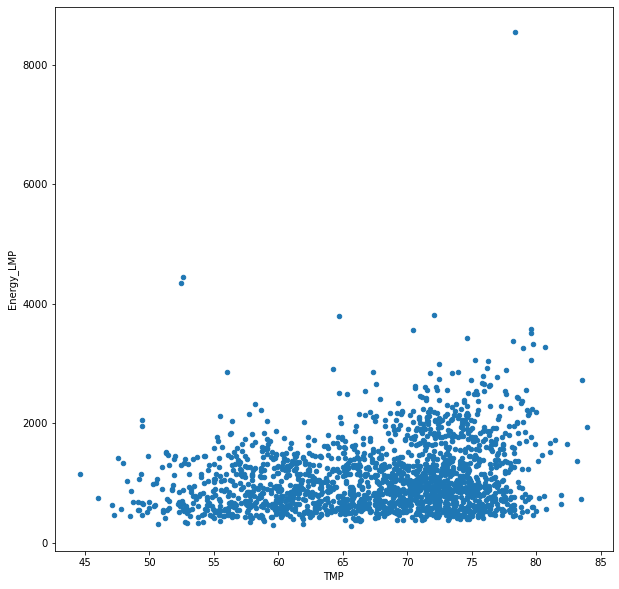

In [158]:
tdp.plot(x = 'TMP', y = 'Energy_LMP', subplots=True, figsize=(10,10), kind = 'scatter', rot = 0)

<AxesSubplot:xlabel='TMP', ylabel='Energy_LMP'>

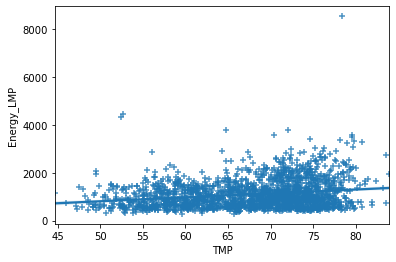

In [159]:
sns.regplot(x = 'TMP', y = 'Energy_LMP', data = tdp, marker = '+',ci = 95)

#### Scatter of Hourly Temp and LMP where TMP is not null

array([<AxesSubplot:xlabel='TMP', ylabel='Energy_LMP'>], dtype=object)

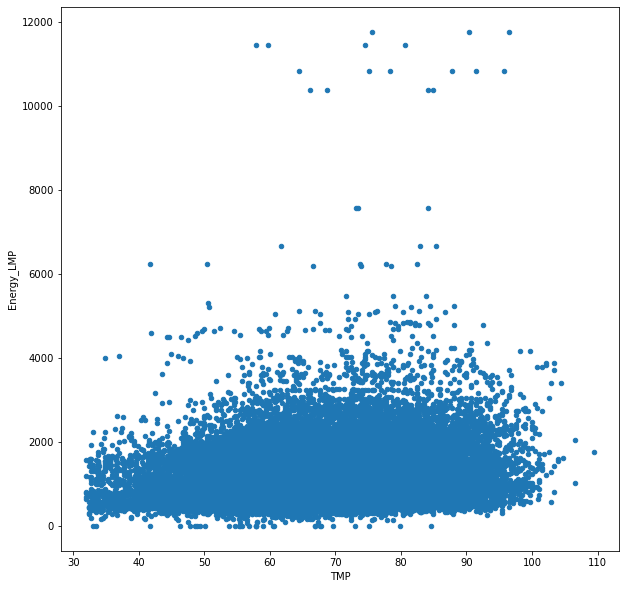

In [160]:
filtered_temp.plot(x = 'TMP', y = 'Energy_LMP', subplots=True, figsize=(10,10), kind = 'scatter', rot = 0)

<AxesSubplot:xlabel='TMP', ylabel='Energy_LMP'>

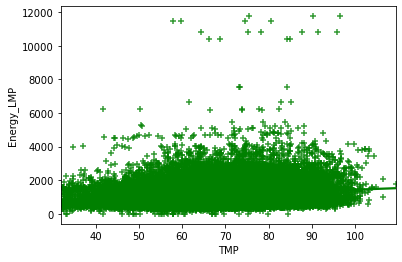

In [161]:
sns.regplot(x = 'TMP', y = 'Energy_LMP', data = filtered_temp, marker = '+',ci = 95, color = 'green')

#### Scatter of AVG LMP vs Index Gas Price

<AxesSubplot:xlabel='GD Waha', ylabel='Energy_LMP'>

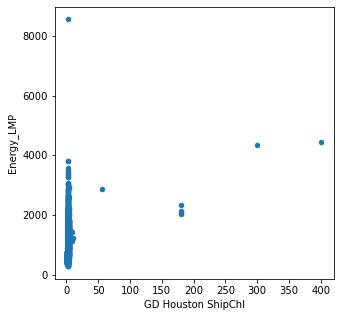

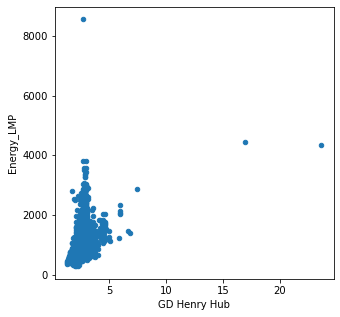

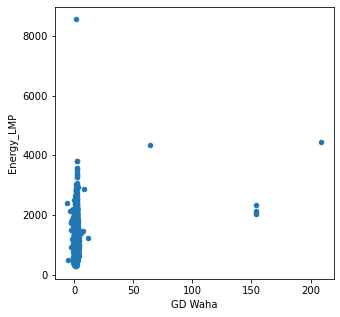

In [150]:
price_index = price_features.groupby('Date')[['LMP' ,'Energy_LMP', 'GD Henry Hub','GD Houston ShipChl','GD Waha']].mean()
price_index.plot(x = 'GD Houston ShipChl', y = 'Energy_LMP', figsize=(5,5), kind = 'scatter', rot = 0)
price_index.plot(x = 'GD Henry Hub', y = 'Energy_LMP', figsize=(5,5), kind = 'scatter', rot = 0)
price_index.plot(x = 'GD Waha', y = 'Energy_LMP', figsize=(5,5), kind = 'scatter', rot = 0)

Outliers are hiding the relationship. Going to remove any price over $10

In [145]:
price_index_rev = price_index[price_index['GD Henry Hub'] < 10]
price_index_rev = price_index_rev[price_index['GD Houston ShipChl'] < 10]
price_index_rev = price_index_rev[price_index['GD Waha'] < 10]

<ipython-input-145-07ed700803f9>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  price_index_rev = price_index_rev[price_index['GD Houston ShipChl'] < 10]
<ipython-input-145-07ed700803f9>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  price_index_rev = price_index_rev[price_index['GD Waha'] < 10]


<AxesSubplot:xlabel='GD Waha', ylabel='Energy_LMP'>

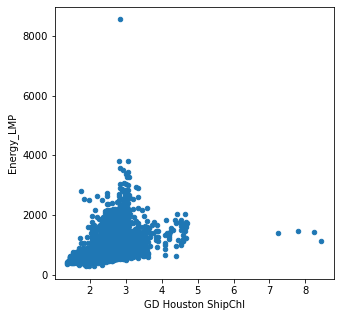

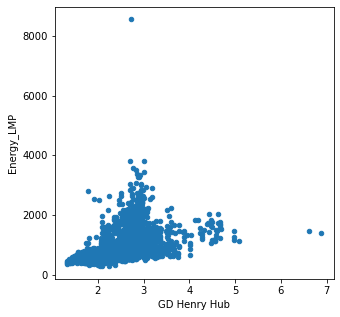

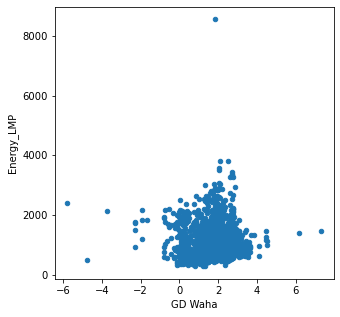

In [151]:
price_index_rev.plot(x = 'GD Houston ShipChl', y = 'Energy_LMP', figsize=(5,5), kind = 'scatter', rot = 0)
price_index_rev.plot(x = 'GD Henry Hub', y = 'Energy_LMP', figsize=(5,5), kind = 'scatter', rot = 0)
price_index_rev.plot(x = 'GD Waha', y = 'Energy_LMP', figsize=(5,5), kind = 'scatter', rot = 0)

Henry Hub appears to have the strongest correlation and the most realisting prices. Might choose this price index.

#### Boxplot of every variable in the dataframe

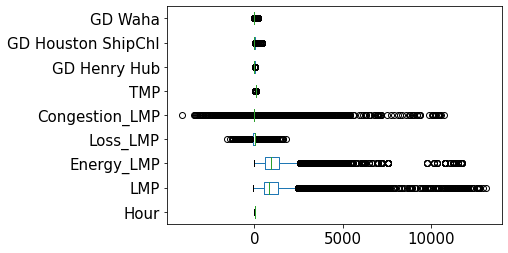

In [152]:
boxplot = price_features.boxplot(grid=False, vert=False,fontsize=15)

#### Correlations 

In [156]:
price_features.corr()

,Hour,LMP,Energy_LMP,Loss_LMP,Congestion_LMP,TMP,GD Henry Hub,GD Houston ShipChl,GD Waha
Hour,1.000000,0.185916,0.213606,-0.006726,-0.009085,0.310641,0.000054,-0.000002,-0.000001
LMP,0.185916,1.000000,0.865855,0.396728,0.407154,0.219535,0.301387,0.165447,0.129209
Energy_LMP,0.213606,0.865855,1.000000,0.075041,-0.087953,0.167029,0.365393,0.193573,0.146975
Loss_LMP,-0.006726,0.396728,0.075041,1.000000,0.453077,0.155983,-0.044856,-0.045740,-0.023780
Congestion_LMP,-0.009085,0.407154,-0.087953,0.453077,1.000000,0.118000,-0.043988,-0.002622,0.003037
TMP,0.310641,0.219535,0.167029,0.155983,0.118000,1.000000,-0.153413,-0.054250,-0.064926
GD Henry Hub,0.000054,0.301387,0.365393,-0.044856,-0.043988,-0.153413,1.000000,0.670041,0.499150
GD Houston ShipChl,-0.000002,0.165447,0.193573,-0.045740,-0.002622,-0.054250,0.670041,1.000000,0.911328
GD Waha,-0.000001,0.129209,0.146975,-0.023780,0.003037,-0.064926,0.499150,0.911328,1.000000


#### Correlation Heat Map

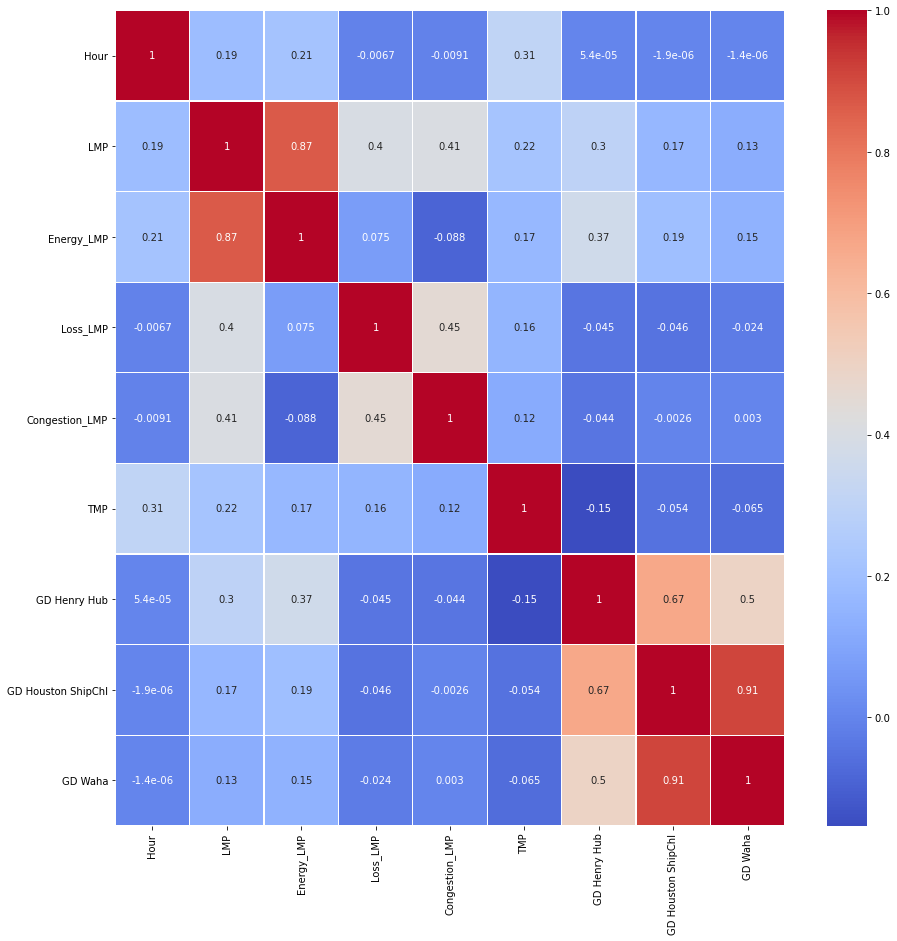

In [157]:
plt.figure(figsize=(15,15))
sns.heatmap(price_features.corr(),linewidths=.1,cmap="coolwarm", annot=True)
plt.yticks(rotation=0);

#### Pairplot

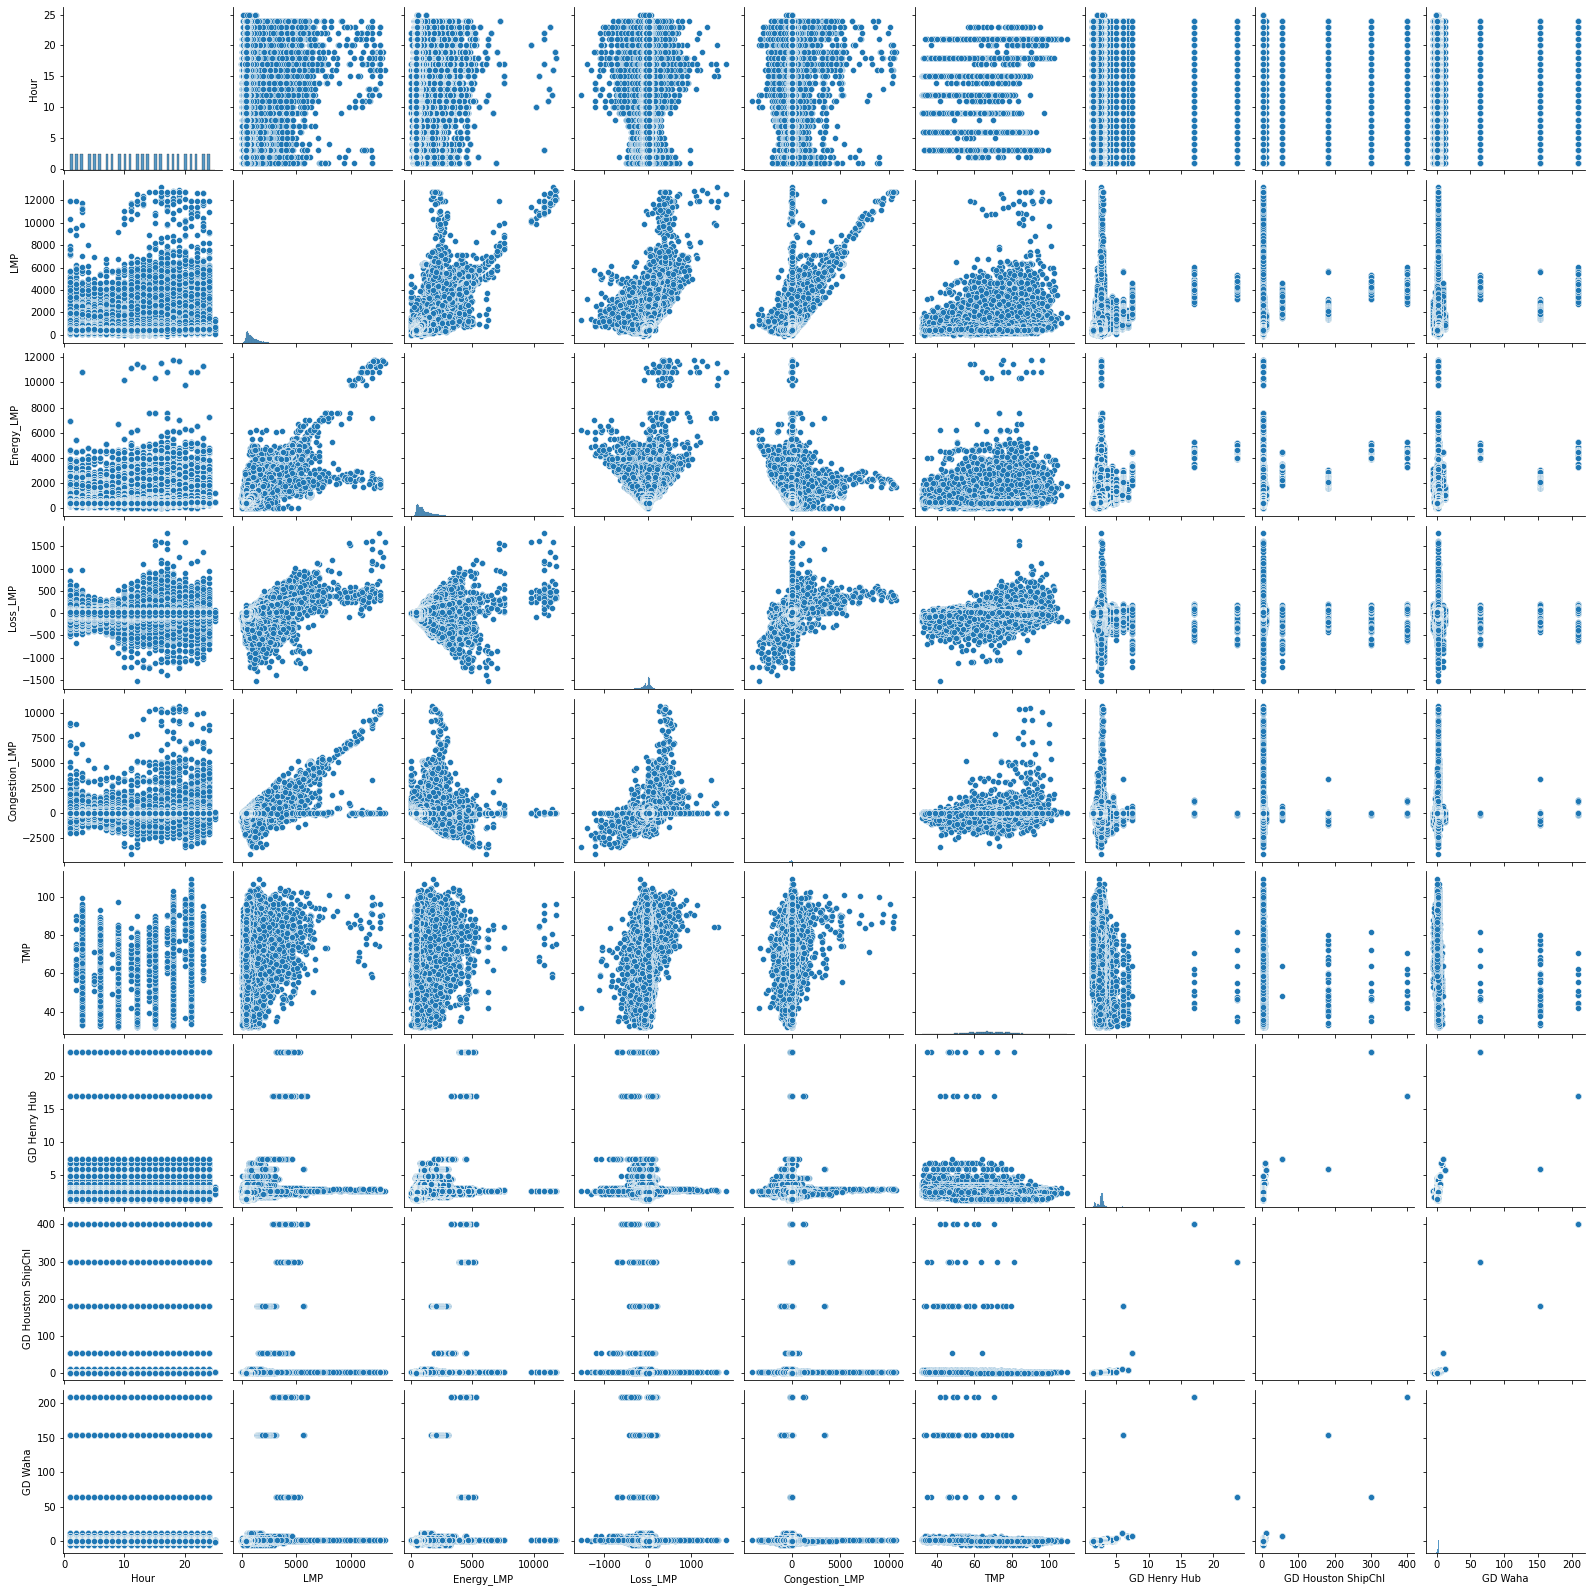

In [155]:
g = sns.pairplot(price_features)

## Summary

Through EDA, I made the following observations: <br>
$\;\;\;\;\;\;$    Noticed an error in Temp data <br>
$\;\;\;\;\;\;$    Observed the impact of hour of the day on price<br>
$\;\;\;\;\;\;$    Noticed that zone mainly effects the Congestion and Loss components of the price<br>
$\;\;\;\;\;\;$    Plotted the correlation between TEMP and LMP<br>
$\;\;\;\;\;\;$    Plotted the correlation between Price Index and LMP with outliers removed<br>
$\;\;\;\;\;\;$    Plotted Correlation Heat map and Pairplots.<br>

Using market knowledge, I have discovered that there was a methodology change in price calculation in 2017. 2016 data may be obsolete. This methodology change is shown in the time series LMP plot. The effect of the Coronavirus pandemic is also clear in this plot. Not sure if I want to use these time frames.  